# Unidade III - Aprendizagem Supervisionada - Classificação
# Aula 02: Algoritmo de Árvores de Decisão
# Roteiro
 * Entendendo o Algoritmo de Árvores de Decisão
 * Construindo classificadores baseados em Árvores de Decisão
 * Controle da complexidade das Árvores de Decisão
 * Analisando Árvores de Decisão
 * Importância dos Atributos
 * Vantagens, desvantagesn e hiperparâmetros

## Entendendo o Algoritmo de Árvores de Decisão

Árvores de decisão são algoritmos de aprendizagem de máquina que podem ser usados para tarefas tanto de classificação quanto de regressão. Essencialmente, eles aprendem uma hierarquia de perguntas do tipo **"if-else"**, levando a um encadeamento de decisões. Essas perguntas são semelhantes às perguntas que você pode fazer em um jogo de perguntas e respostas. Imagine que você queira distinguir entre os quatro animais a seguir: **ursos (Bear), falcões (Hawk), pinguins (Penguin) e golfinhos (Dolphin)**. Seu objetivo é chegar à resposta certa fazendo o mínimo possível de perguntas. 

In [1]:
import mglearn
import warnings
warnings.filterwarnings('ignore')

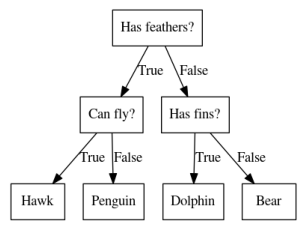

In [2]:
mglearn.plots.plot_animal_tree()

## Construindo classificadores baseados em Árvores de Decisão

Vamos analisar o processo de construção de uma árvore de decisão para um conjunto de dados genérico 2D mostrado na Figura a seguir. O conjunto de dados possui duas formas de meia-lua de pontos azuis e vermelhos, consistindo em 50 pontos de dados cada.

Normalmente, os dados não vêm na forma de atributos binários Sim / Não, como no exemplo dos animais, mas são representados como atributos contínuos, como no conjunto de dados 2D mostrado na Figura acima. Os testes que são usados em dados contínuos são do tipo “o atributo **i** é maior que o valor **a**”. Para construir uma árvore, o algoritmo analisa todos os testes possíveis e encontra aquele que é mais informativo sobre a variável em questão.

O gŕafico com **depth=1** mostra o primeiro teste que é realizado: dividir o conjunto de dados horizontalmente em **x[1] <= 0.06**, que é a melhor linha de corte para separar os pontos azuis dos vermelhos. O nó superior, também chamado de raiz, representa todo o conjunto de dados, consistindo em 50 pontos vermelhos e 50 pontos azuis. Se o teste for verdadeiro, o ponto é atribuído ao nó esquerdo, que contém 2 pontos azuis e 32 pontos vermelhos. Caso contrário, o ponto é atribuído ao nó direito, que contém 48 pontos azuis e 18 vermelhos. Esses dois nós correspondem às regiões superior e inferior mostradas na Figura.

Mesmo que a primeira divisão tenha feito um bom trabalho ao separar os pontos azuis e vermelhos, a região inferior ainda contém pontos azuis e a região superior ainda contém muitos pontos vermelhos. Podemos construir um modelo mais preciso, repetindo o processo de busca do melhor teste em ambas as regiões. A Figura com **depth=2** mostra que a próxima divisão mais informativa para a região esquerda e direita é baseada em x[0]. Este processo recursivo produz uma árvore binária de decisões, com cada nó contendo um teste.

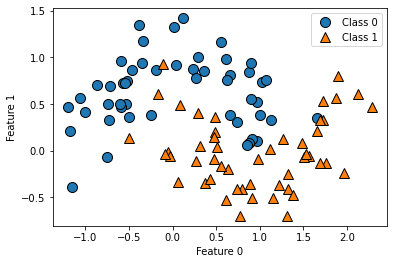

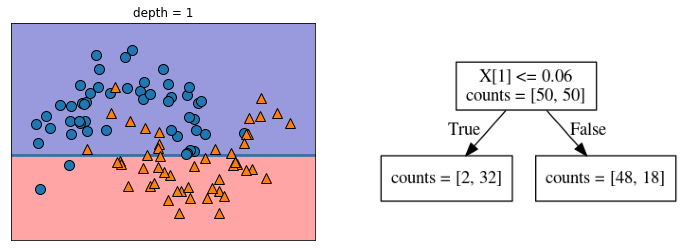

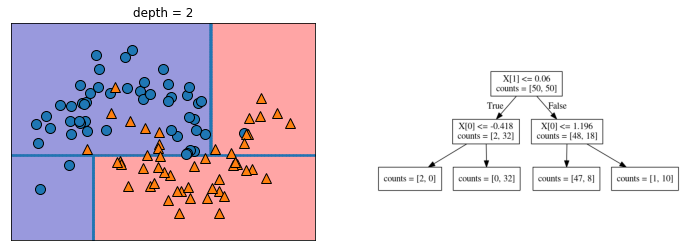

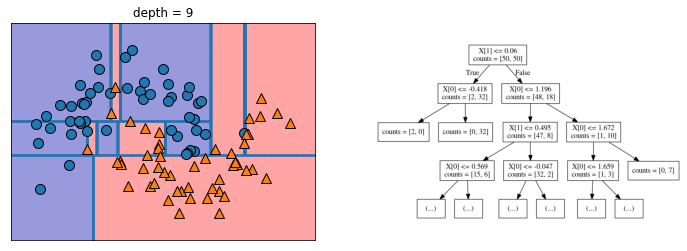

In [3]:
mglearn.plots.plot_tree_progressive()

## Controle da complexidade das Árvores de Decisão

Normalmente, construir uma árvore conforme descrito anteriormente e continuar até que todas as folhas sejam "puras" leva a classificadores muito complexos e muito adaptados aos dados de treinamento. A presença de folhas puras significa que uma árvore é 100% precisa no conjunto de treinamento; cada item de dados no conjunto de treinamento está em uma folha que possui a classe majoritária correta. O overfitting pode ser visto em uma pequena faixa azul ao redor do único ponto azul no centro da Figura acima. 

Existem duas estratégias comuns para evitar o overfitting: interromper a criação da árvore antes do tempo, também chamado de **pré-poda**, ou construir a árvore, mas depois remover ou recolher nós que contêm pouca informação, também chamado de **pós-poda** ou apenas poda. Os possíveis critérios para a pré-poda incluem limitar a profundidade máxima da árvore, limitar o número máximo de folhas ou exigir um número mínimo de pontos
em um nó para continuar dividindo-o.

### Pré-poda (a biblioteca scikit-learn não disponibiliza a pós-poda)

Vejamos o efeito da pré-poda em mais detalhes no conjunto de dados sobre câncer de mama. Como sempre, importamos o conjunto de dados e o dividimos em uma parte de treinamento e teste. Em seguida, construímos um classificador usando a configuração padrão de desenvolvimento total da árvore (crescendo a árvore até que todas as folhas estejam puras). Corrigimos o random_state na árvore, que é usado para desempate internamente.

Como esperado, a precisão no conjunto de treinamento é de 100%, pois as folhas são puras. A precisão do conjunto de teste é um pouco pior, possui torno de 93% de precisão.

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Acurácia do conjunto de Treinamento: {:.3f}".format(tree.score(X_train, y_train)))
print("Acurácia do conjunto de Teste: {:.3f}".format(tree.score(X_test, y_test)))

Acurácia do conjunto de Treinamento: 1.000
Acurácia do conjunto de Teste: 0.937


Agora, vamos aplicar a **pré-poda**, que interromperá o crescimento da árvore antes de ajustarmos perfeitamente aos dados de treinamento. Uma maneira possível é parar de construir a árvore depois que uma certa profundidade for atingida. Aqui, definimos **max_depth = 4**, o que significa que apenas quatro perguntas consecutivas podem ser feitas. Limitar a profundidade da árvore diminui o overfitting. Isso leva a uma menor precisão no conjunto de treinamento, mas a um melhor desempenho no conjunto de teste.

In [5]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Acurácia do conjunto de Treinamento: {:.3f}".format(tree.score(X_train, y_train)))
print("Acurácia do conjunto de Teste: {:.3f}".format(tree.score(X_test, y_test)))

Acurácia do conjunto de Treinamento: 0.988
Acurácia do conjunto de Teste: 0.951


## Analisando Árvores de Decisão

Podemos visualizar uma árvore de decisão usando a função **export_graphviz** do pacote scikit-learn. Ela cria um arquivo no formato dot, que é um formato de texto específico para armazenar gráficos. Definimos uma opção para colorir os nós para refletir a classe majoritária em cada um deles e passar os nomes das classes e atributos para que a árvore possa ser devidamente rotulada. O resultado pode ser visualizado na Figura a seguir. A visualização da árvore fornece uma visão detalhada de como o algoritmo faz previsões, sendo um exemplo facilmente explicável para não especialistas. Árvores mais profundas (acima de dez níveis) são mais difíceis de apreender. Um método de inspecionar a árvore que pode ser útil é descobrir qual caminho a maioria dos dados realmente segue.

In [6]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

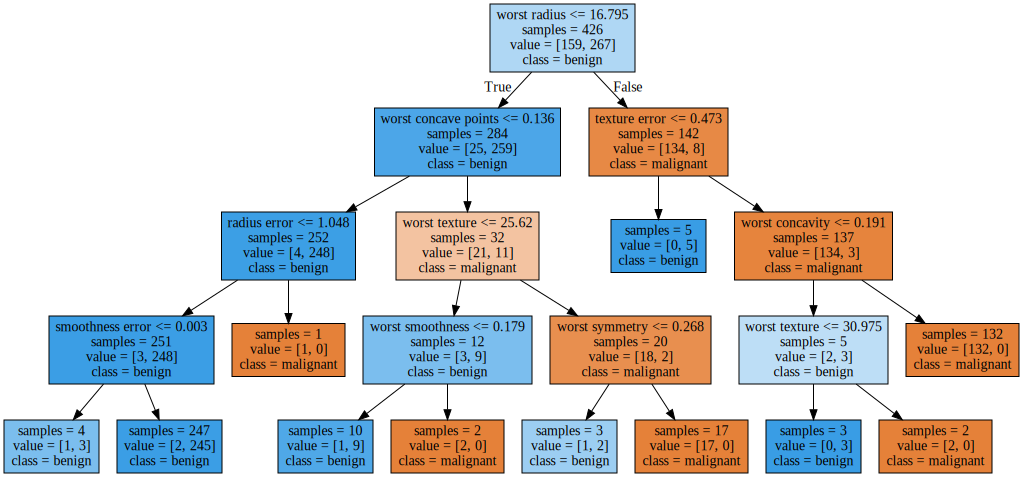

In [7]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## Importância dos Atributos

In [ ]:
print("Importância dos Atributos:")
print(tree.feature_importances_)

Ao invés de analisar a árvore inteira, o que pode ser exaustivo, existem algumas métricas estatísticas úteis que podemos usar para resumir o comportamento da árvore. A métrica mais usada é a **importância do atributo**, que avalia a importância de cada atributo para a decisão que uma árvore toma. É representada por um número entre 0 e 1 para cada atributo, em que 0 significa “nada usado” e 1 significa “prediz perfeitamente a classe”. A soma das métricas de importância de todos os recursos é igual a 1. A Figura a seguir mostra a importância dos atributos para o conjunto de dados sobre câncer de mama.

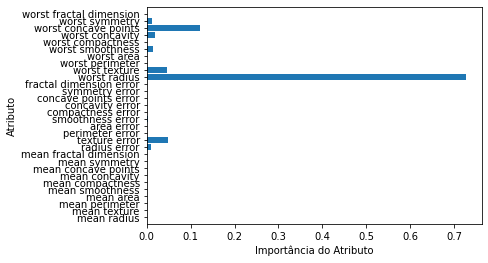

In [8]:
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Importância do Atributo")
    plt.ylabel("Atributo")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

O gráfico abaixo mostra um conjunto de dados genérico com dois atributos e duas classes. 

A relação entre X[1] e a classe dos itens é monótona, isso significa que podemos dizer “um valor alto de X[1] significa classe vermelha e um valor baixo significa classe azul”.

Feature importances: [0. 1.]


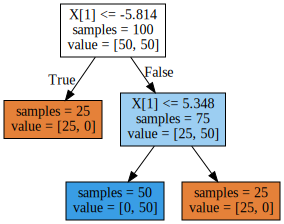

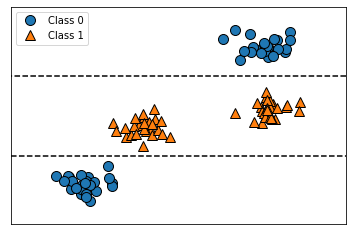

In [9]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

## Vantagens, desvantagens e hiperparâmetros

Conforme discutido anteriormente, os hiperparâmetros que controlam a complexidade do algoritmo de árvores de decisão são aqueles que interrompem a construção da árvore antes que ela seja totalmente desenvolvida. Normalmente, pode-se escolher estratégias de “poda” da árvore para evitar o overfitting, configurando hiperparâmetros como **max_depth**, **max_leaf_nodes** ou **min_samples_leaf**.

As árvores de decisão têm duas vantagens sobre muitos dos algoritmos de aprendizagem de máquina: o classificador resultante pode ser facilmente visualizado e compreendido por não especialistas (pelo menos para árvores menores) e eles são completamente invariáveis para o dimensionamento dos dados, ou seja, o atributo é processado separadamente e as possíveis divisões dos dados não dependem de atividades de pré-processamento, como normalização ou padronização. As árvores de decisão funcionam bem quando você tem atributos que estão em escalas completamente diferentes ou uma mistura de atributos binários e contínuos. A principal desvantagem desse algoritmo é que, mesmo com o uso de estratégias de “poda”, as árvores de decisão tendem a se ajustar demais e não fornecem um bom desempenho de generalização.